### Map of the Macquarie Ridge study domain with float trajectories

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import seaborn as sns
import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from shapely.geometry.polygon import LinearRing

%matplotlib inline

plt.rcParams['font.size'] = '15'

In [2]:
import imp
import src.importData as imports
import src.maps as maps
import src.settings as settings
import src.calc as calc
import src.interpolation as interp

In [14]:
floatids = [8489, 8490, 8492, 8493]
ema = imports.importFloatData(floatids)

datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data')
alt_cmems = imports.importNetCDF(datadir, 'CMEMS.nc', datatype ='altimetry')

ds = imports.importNetCDF(datadir, 'FSLE.nc')
ds = ds.rename({'lat':'latitude', 'lon':'longitude'})

bathymetry =  imports.importNetCDF(datadir, 'bathy.nc', datatype ='bathy')
bathymetry['depth'] = bathymetry.elevation*-1
new_bathy = bathymetry.coarsen(lon=10).mean().coarsen(lat=10).mean()

In [4]:
# Triaxus
datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'triaxus')
folder = 'in2018_v05CtdAvgTriaxus_VerticalCasts_nc'

lst = ['01_002', '02_002', '02_005', '03_003', '04_002', '04_003', 
       '06_002', '07_002', '08_002', '08_003', '09_002', '09_003']
triaxus_cast = {}
for i in lst:
    file = 'in2018_v05_'+ i +'AvgCast.nc'
    triaxus_cast[i] = imports.importNetCDF(datadir, file, datatype = folder)

In [5]:
pal = sns.color_palette("husl", 4)
pal.as_hex()[:]

['#f77189', '#97a431', '#36ada4', '#a48cf4']

Text(0.5, 0, 'Longitude (°E)')

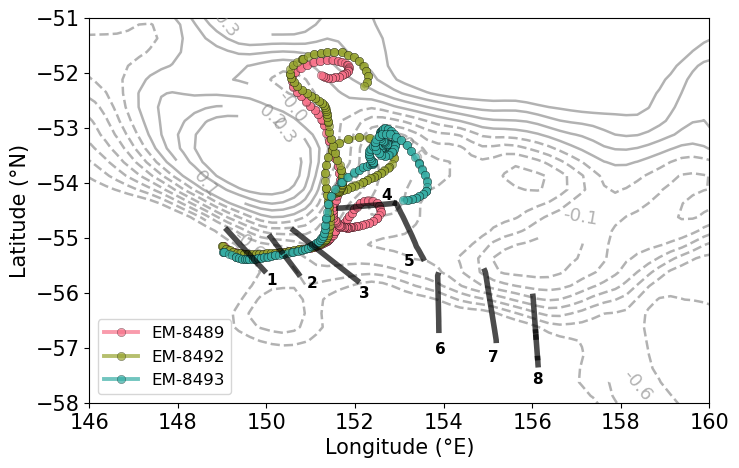

In [6]:
fig, ax = plt.subplots(figsize = (8,5))
# Draw float trajectories
cols = pal.as_hex()[:]
legend = []
i = 0
for floatid in [8489, 8492, 8493]:
    rs = calc.findRSperiod(ema[floatid])
    ax.plot(ema[floatid].longitude[rs], ema[floatid].latitude[rs],'.-', linewidth = 2.8, markersize=12, c = cols[i], markeredgecolor='k', markeredgewidth= 0.25, alpha = 0.7, zorder = 5)
    legend.append(f'EM-{floatid}')
    i+=1
    
for i in lst:
    lon = triaxus_cast[i].longitude
    lat = triaxus_cast[i].latitude
    plt.plot(lon, lat, c = 'k', alpha = 0.7, linewidth = 4, zorder = 10)

start = ema[floatid].time.values[0]
end = ema[floatid].time[rs].values[-1] 
start_time = str(start.astype('M8[D]'))
end_time = str(end.astype('M8[D]'))
mean_sea_level = alt_cmems.adt.sel(time = slice(start_time, end_time)).mean(dim = 'time')

# SSH contours
levels = np.arange(-0.7,0.4,0.1)
CS = mean_sea_level.plot.contour(colors = 'grey', linewidths = 1.8, alpha = 0.6, levels = levels)
plt.clabel(CS, inline=True, fontsize=13, fmt = '%1.1f')

ax.set_ylim(-58, -51)
ax.set_xlim(146, 160)
ax.legend(legend, loc = 'lower left', prop={'size': 12})

#numbering
ax.text(150, -55.85, '1', fontsize = 11, fontweight = 'bold')
ax.text(150.9, -55.9, '2', fontsize = 11, fontweight = 'bold')
ax.text(152.1, -56.1, '3', fontsize = 11, fontweight = 'bold')
ax.text(152.6, -54.3, '4', fontsize = 11, fontweight = 'bold')
ax.text(153.1, -55.5, '5', fontsize = 11, fontweight = 'bold')
ax.text(153.8, -57.1, '6', fontsize = 11, fontweight = 'bold')
ax.text(155, -57.25, '7', fontsize = 11, fontweight = 'bold')
ax.text(156, -57.65, '8', fontsize = 11, fontweight = 'bold')


plt.ylabel(u'Latitude (\N{DEGREE SIGN}N)')
plt.xlabel(u'Longitude (\N{DEGREE SIGN}E)')

In [7]:
# my_path = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd','figures')
# settings.save_figure(fig, my_path, 'map_triaxus_tows.png', dpi = 300, pad = 0.2)

In [8]:
print(start, end)

2018-10-21T08:00:43.000000000 2018-12-05T08:00:27.000000000


In [9]:
datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data')
alt_cmems_extend = imports.importNetCDF(datadir, 'cmems_20yr_adt.nc', datatype ='altimetry')

In [10]:
# 20 year average positions of PF and SAF to shown standing meander?
alt_cmems_extend

<xarray.Dataset>
Dimensions:    (time: 7306, latitude: 41, longitude: 121)
Coordinates:
  * latitude   (latitude) float32 -59.88 -59.62 -59.38 ... -50.38 -50.12 -49.88
  * time       (time) datetime64[ns] 1998-12-01 1998-12-02 ... 2018-12-01
  * longitude  (longitude) float32 144.9 145.1 145.4 145.6 ... 174.4 174.6 174.9
Data variables:
    adt        (time, latitude, longitude) float64 ...
    crs        int32 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2022-08-04T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2022-08-03T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [11]:
t1 = '1998-12-01'
t2 = '2018-12-01'

adt_20_yr = alt_cmems_extend.adt.sel(time = slice(t1, t2))

Text(0.5, 0, 'Longitude [°E]')

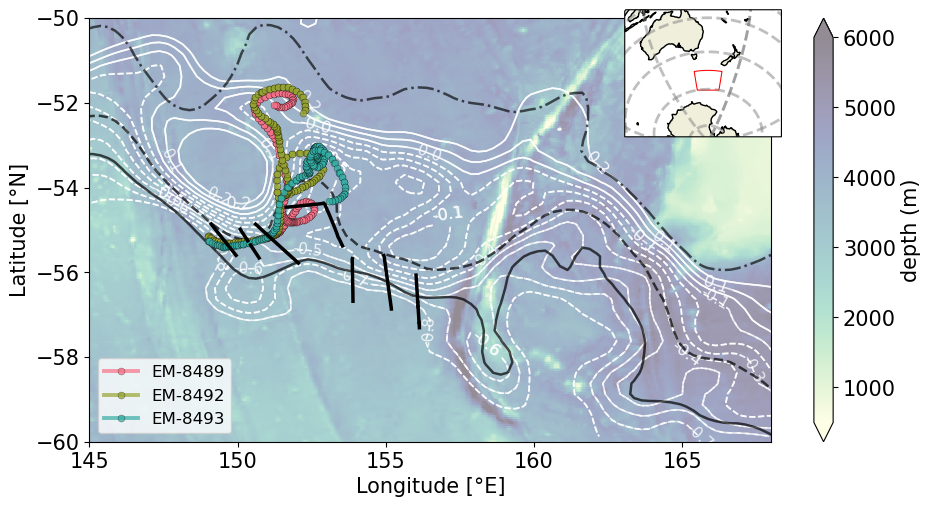

In [12]:
imp.reload(maps)

floatids = [8489, 8492, 8493]

fig, ax = maps.floatDomain(floatids, bathymetry, alt_cmems, extent = [145,168,-60,-50], fig_size = (11,5.5), 
                                                                            pal = sns.color_palette("husl", 4), 
                                                                            save_fig = False)
# SSH contours
levels = np.arange(-0.8,0.3,0.1)
CS = mean_sea_level.plot.contour(ax = ax, colors = 'white', linewidths = 1.2, alpha = 0.8, levels = levels)
plt.clabel(CS, inline=True, fontsize=11, fmt = '%1.1f')

# PF
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(-0.65, -0.64, 0.05), linestyles = '-',
                                         colors = 'k', alpha = 0.7, linewidths = 1.8, zorder = 5)

# SAF-S
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(-0.4, -0.39, 0.05), linestyles = '--',
                                         colors = 'k', alpha = 0.7, linewidths = 1.8, zorder = 5) 

# SAF-N
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(0.21, 0.22, 0.05), linestyles = '-.',
                                         colors = 'k', alpha = 0.65, linewidths = 1.8, zorder = 5) 


ax.set_ylim(-60, -50)
ax.set_xlim(145, 168)

for i in lst:
    lon = triaxus_cast[i].longitude
    lat = triaxus_cast[i].latitude
    ax.plot(lon, lat, c = 'k', alpha = 1, linewidth = 2.5, zorder = 10)

ax.set_ylabel(u'Latitude [\N{DEGREE SIGN}N]')
ax.set_xlabel(u'Longitude [\N{DEGREE SIGN}E]')

# my_path = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd','figures', 'chapter2_manuscript', 'revision_figures')
# settings.save_figure(fig, my_path, 'domain_map.png', dpi = 600, pad = 0.2)

148.95309 -55.24446833333333 2018-10-21T07:12:22.000000000
149.010915 -55.25306666666667 2018-10-21T08:00:43.000000000
149.00038166666667 -55.14724833333333 2018-10-21T12:35:17.000000000
149.02387833333333 -55.14499333333333 2018-10-21T13:09:37.000000000


Text(0, 0.5, 'Latitude [°N]')

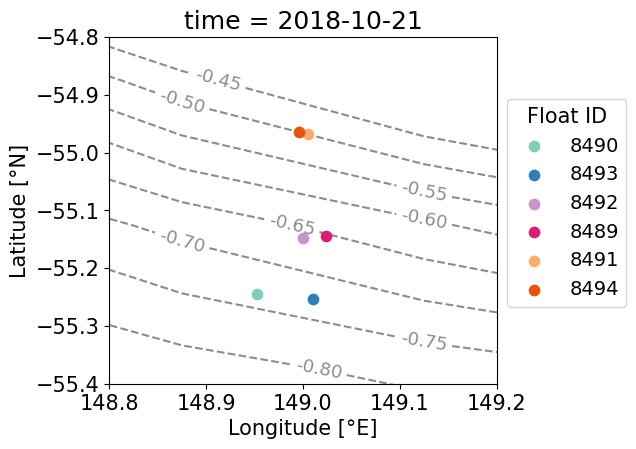

In [15]:
fig, ax = plt.subplots(figsize = (5,4.5))

cols = ["#7fcdbb", "#2c7fb8", "#c994c7", "#dd1c77"]


floatids = [8490, 8493, 8492, 8489]
i = 0
for floatid in floatids:
    plt.scatter(ema[floatid].longitude[0], ema[floatid].latitude[0], c = cols[i], s = 55)
    print(ema[floatid].longitude[0].data, ema[floatid].latitude[0].data, ema[floatid].time[0].data)
    i += 1

plt.scatter(149.0050, -54.9677, c = "#fdae6b", s = 55) # float 8491
plt.scatter(148.9961, -54.96378, c = "#e6550d", s = 55) # float 8494

plt.xlim(148.8,149.2)
plt.ylim(-55.4,-54.8)
plt.legend(['8490', '8493', '8492', '8489', '8491', '8494'], prop={'size': 14}, bbox_to_anchor=(1.36, 0.85))
ax.get_legend().set_title("Float ID")

CS = alt_cmems.sel(latitude = slice(-56,-54), longitude = slice(148.5,149.5), time = '2018-10-21').adt.plot.contour(
                                                            colors = 'grey', alpha = 0.9, linewidths = 1.5, 
                                                            levels = np.arange(-0.8, -0.4, 0.05), zorder = 0)
plt.clabel(CS, inline=True, fontsize=13, fmt = '%1.2f')

ax.set_xlabel(u'Longitude [\N{DEGREE SIGN}E]')
ax.set_ylabel(u'Latitude [\N{DEGREE SIGN}N]')

float 8492 end of rs: 2018-12-05


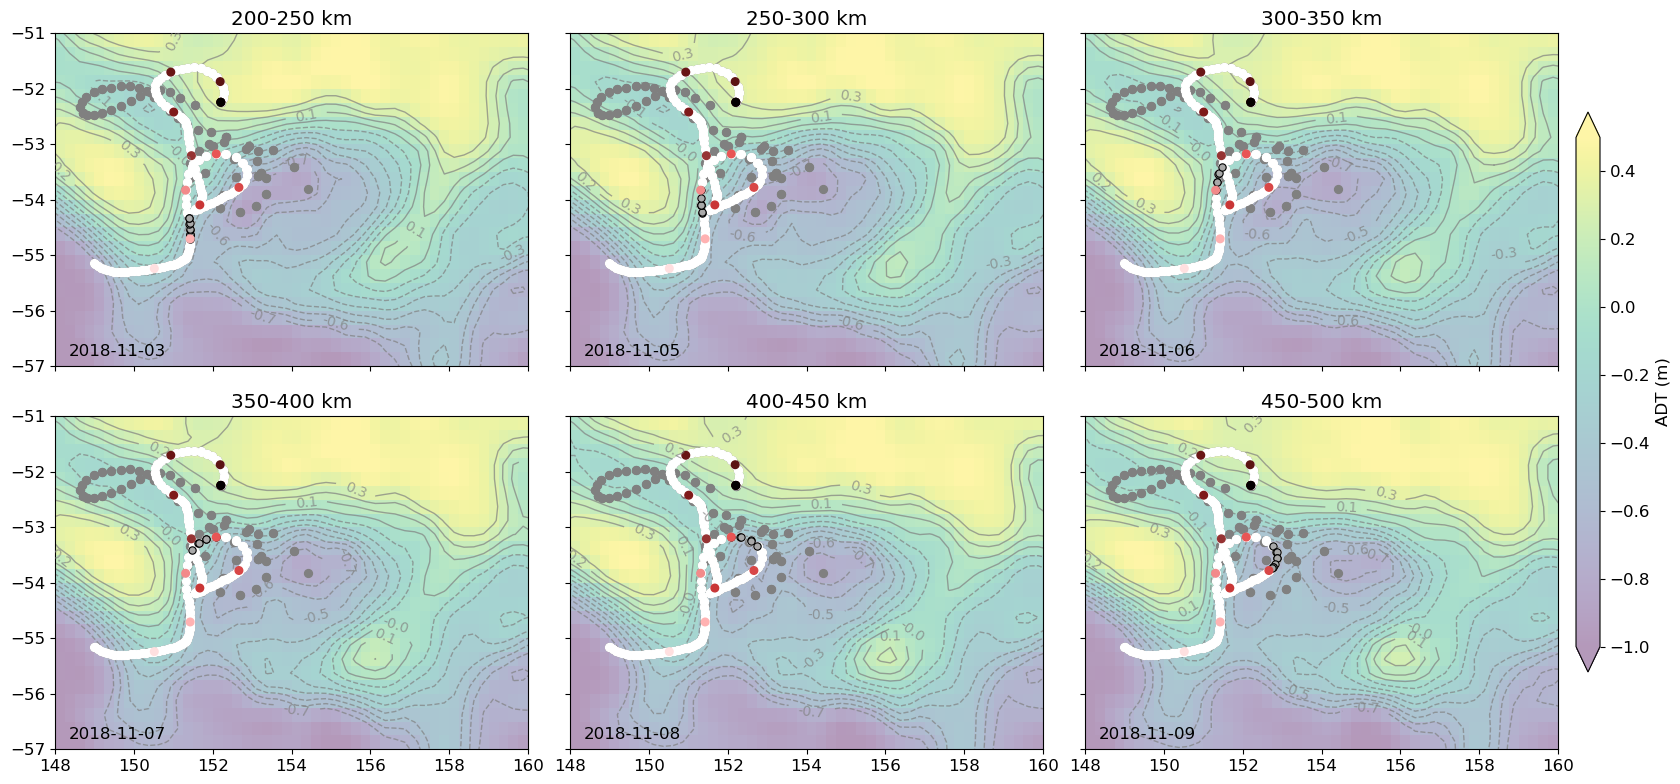

In [29]:
imp.reload(maps)

floatid = 8492
float_num = ema[floatid]
my_lst = [25, 50, 75, 100, 125, 150]
my_lst = [200, 250, 300, 350, 400, 450]
maps.plotMapWithDist(float_num, floatid, alt_cmems, dotsize = 32, panel = True, dist_list = my_lst)

Float 8489: start of rs: 2018-10-21, end of rs: 2018-12-05
Float 8490: start of rs: 2018-10-21, end of rs: 2018-12-05
Float 8492: start of rs: 2018-10-21, end of rs: 2018-12-05
Float 8493: start of rs: 2018-10-21, end of rs: 2018-12-05


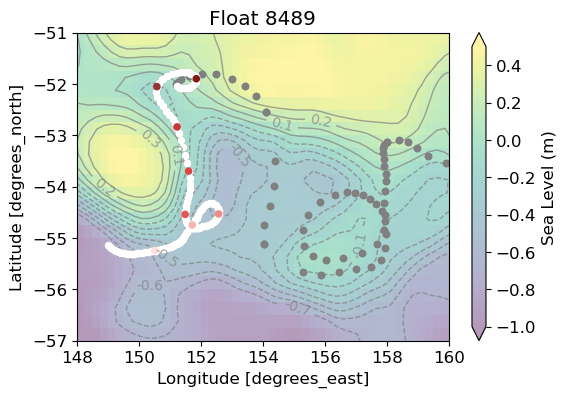

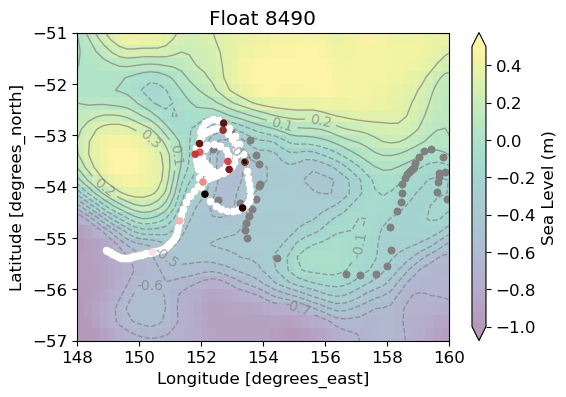

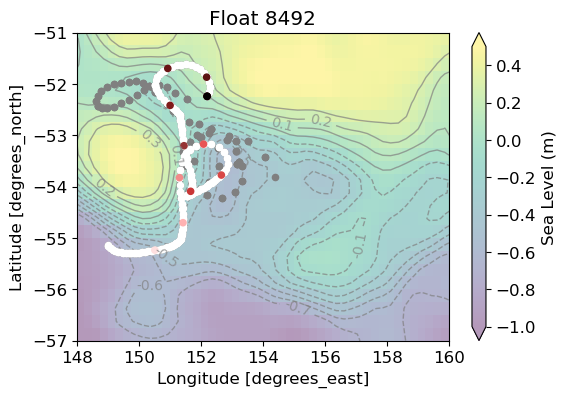

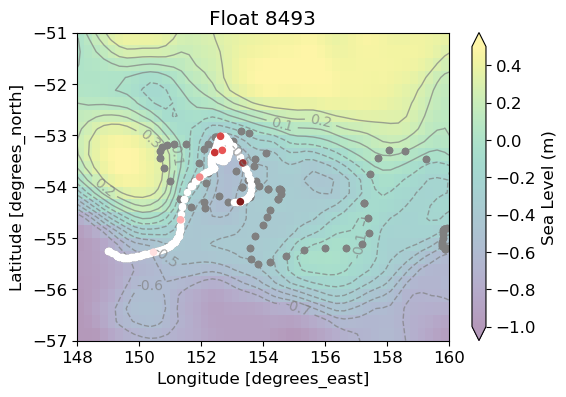

In [23]:
imp.reload(maps)

repo = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd','figures','trajectories')
floatids = [8489, 8490, 8492, 8493]

for floatid in floatids:
    float_num = ema[floatid]
    maps.plotMapWithDist(float_num, floatid, alt_cmems)# save_fig = True, my_path = repo)

In [30]:
float_num = ema[8492]

lon =slice(148,160)
lat = slice(-57,-51)
    
start = float_num.time.values[0]  - np.timedelta64(7, 'D')
end = float_num.time.values[-1] + np.timedelta64(7, 'D')

start_time, end_time = str(start.astype('M8[D]')), str(end.astype('M8[D]'))

ssh = alt_cmems.adt.sel(time = slice(start_time, end_time), longitude = lon, latitude = lat)

In [31]:
# start_time = '2019-02-03'
# end_time = '2019-07-03'
# ssh = alt_cmems.adt.sel(time = slice(start_time, end_time), longitude = lon, latitude = lat)

Weekly average snapshots of SSH beginning one week before float sampling period


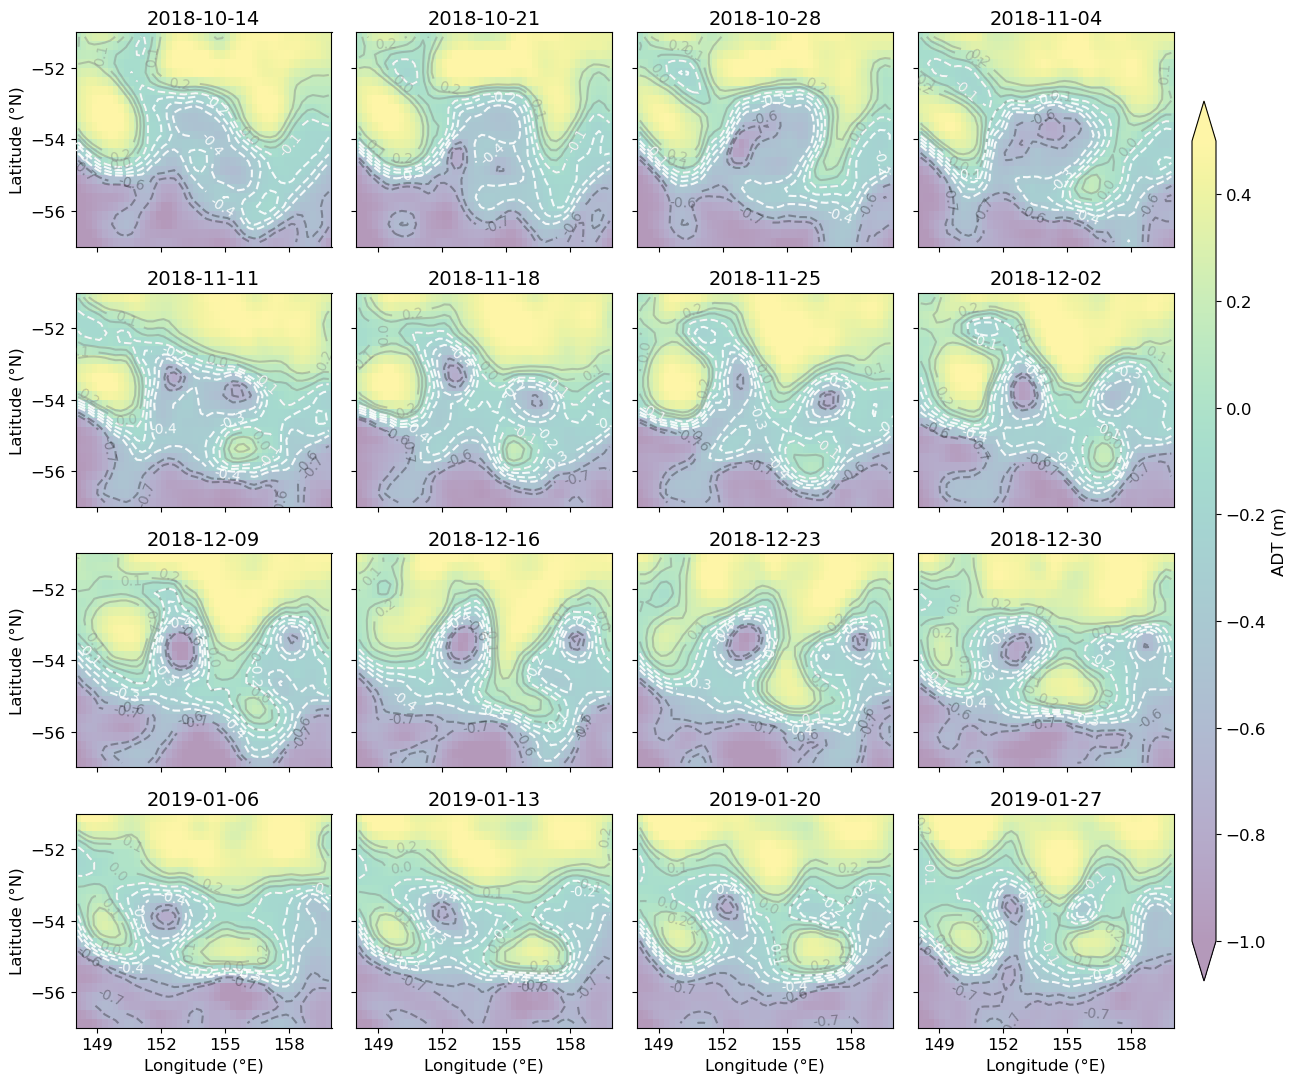

In [32]:
fig, axs = plt.subplots(nrows = 4, ncols=4, sharey = True, sharex = True, figsize = (12,11))
axs = axs.flatten()

imp.reload(settings)
SAF, PF, SACCF = settings.frontSSH(reference = ('KimOrsi'))
# levels = np.arange(0,0.4,0.1)
levels = np.arange(-0.4,0,0.1)

interval = 7

i = 0
for t in range(0, interval*len(axs), interval):
    
    im = ssh.isel(time = slice(t,t+7)).mean(dim = "time").plot(ax = axs[i], alpha = 0.4,  cmap = 'viridis', vmin = -1, vmax = 0.5, add_colorbar = False)
    
    CS = ssh.isel(time = slice(t,t+7)).mean(dim = "time").plot.contour(ax = axs[i], colors = 'black', alpha = 0.3, linewidths = 1.5, levels = PF)
    plt.clabel(CS, inline=True, fontsize=10, fmt = '%1.1f')
    
    CS = ssh.isel(time = slice(t,t+7)).mean(dim = "time").plot.contour(ax = axs[i], colors = 'grey', alpha = 0.4, linewidths = 1.5, levels = SAF)
    plt.clabel(CS, inline=True, fontsize=10, fmt = '%1.1f')
            
    CS = ssh.isel(time = slice(t,t+7)).mean(dim = "time").plot.contour(ax = axs[i], colors = 'w', alpha = 0.9, linewidths = 1.5, levels = levels)
    plt.clabel(CS, inline=True, fontsize=10, fmt = '%1.1f')
    
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_yticks(np.arange(-56,-51, 2))
    axs[i].set_xticks(np.arange(149,161, 3))
    axs[i].set_title(str(ssh[t].time.values.astype('M8[D]')), fontsize = 14)
    
    if i in [0,4,8, 12]:
        axs[i].set_ylabel('Latitude (°N)')
    if i in [12, 13, 14, 15]:
        axs[i].set_xlabel('Longitude (°E)')

    i += 1
    
plt.tight_layout(w_pad = 1.2)

cax = plt.axes([1, 0.1, 0.02, 0.8])
cbar = plt.colorbar(im, cax=cax, extend = 'both')
cbar.set_label('ADT (m)')

print('Weekly average snapshots of SSH beginning one week before float sampling period')

In [33]:
u, v = alt_cmems.ugos, alt_cmems.vgos 

In [35]:
speed =  calc.speed(u, v)

In [36]:
speed = speed.sel(time = slice(start_time, end_time), longitude = lon, latitude = lat)

Weekly snapshots of surface geostrophic speed beginning one week before float sampling period


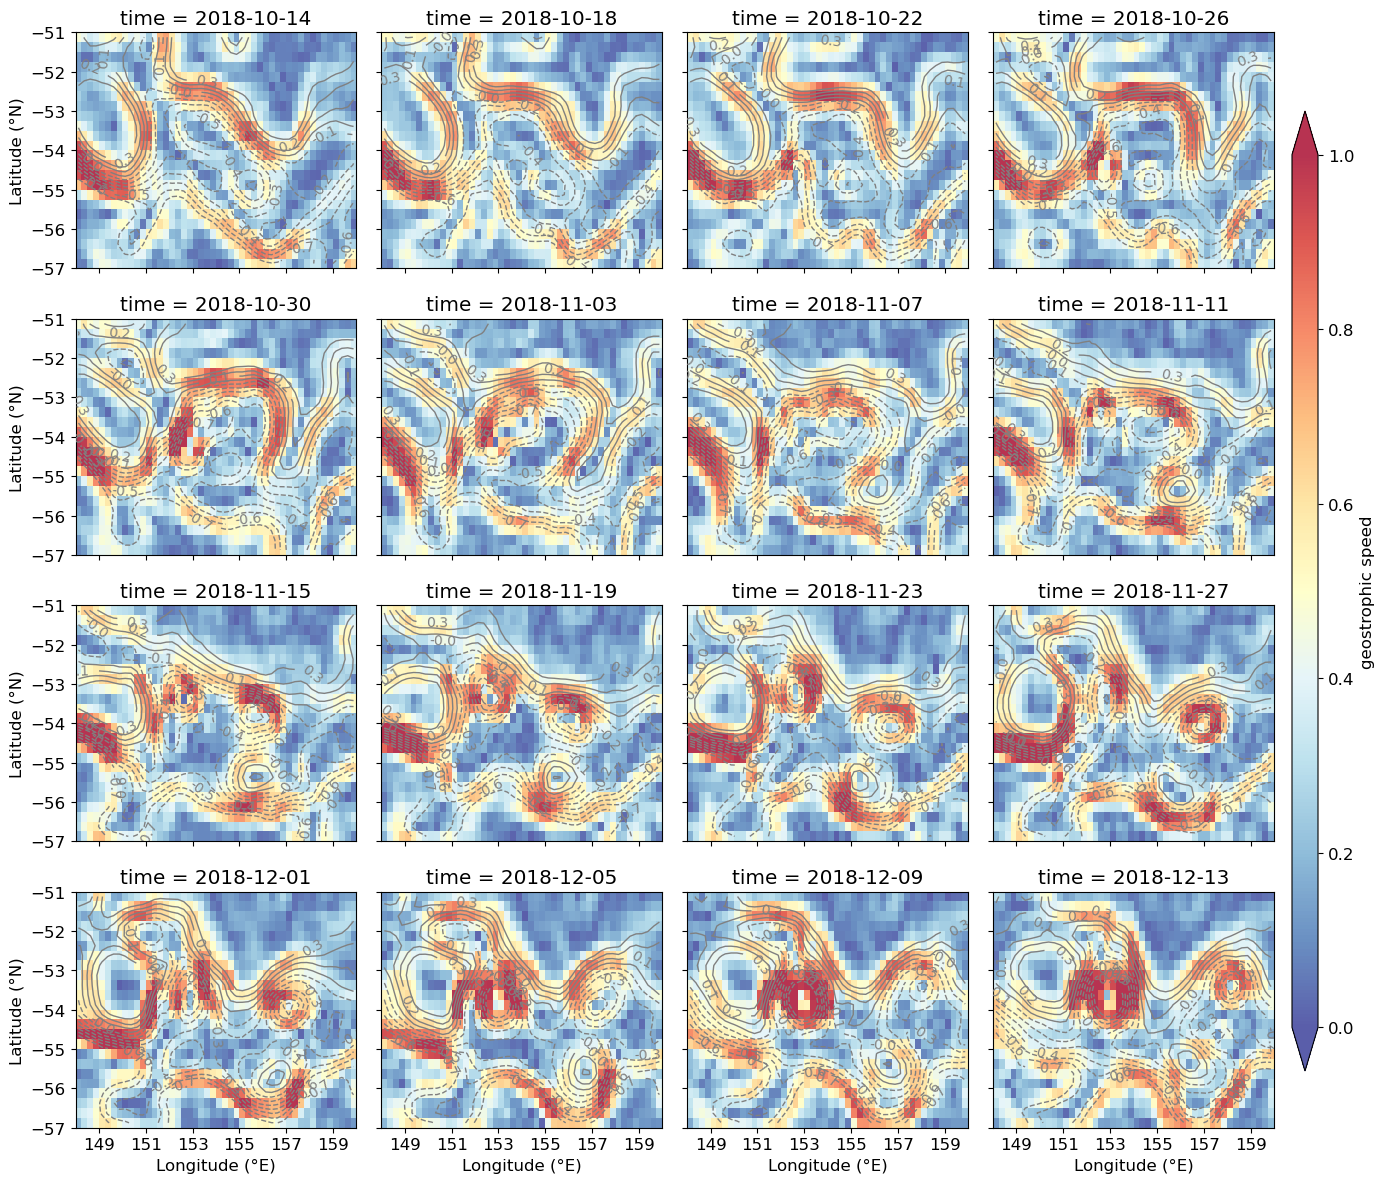

In [42]:
fig, axs = plt.subplots(nrows = 4, ncols=4, sharey = True, sharex = True, figsize = (13,12))
axs = axs.flatten()

levels = np.arange(-0.7,0.4,0.1)

interval = 4

i = 0
for t in range(0, interval*len(axs), interval):
    
    im = speed[t].plot(ax = axs[i],  cmap = 'RdYlBu_r', vmin = 0, vmax = 1, alpha = 0.8, add_colorbar = False)

    CS = ssh[t].plot.contour(ax = axs[i], colors = 'grey', linewidths = 1, levels = levels)
    plt.clabel(CS, inline=True, fontsize=10, fmt = '%1.1f')

    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticks(np.arange(149,161, 2))
    
    if i in [0,4,8, 12]:
        axs[i].set_ylabel('Latitude (°N)')
    if i in [12, 13, 14, 15]:
        axs[i].set_xlabel('Longitude (°E)')

    i += 1
    
plt.tight_layout(w_pad = 1.2)

cax = plt.axes([1, 0.1, 0.02, 0.8])
cbar = plt.colorbar(im, cax=cax, extend = 'both')
cbar.set_label('geostrophic speed')

print('Weekly snapshots of surface geostrophic speed beginning one week before float sampling period')